In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('full_df_no_text.pkl', 'rb') as f:
    df = pickle.load(f)

In [2]:
df.head()

,site,y,global_index,subindex,domain,label,vectorized_links,meta_tfidf,content_tfidf,combined_features
0,http://www.google.com,0,0,0,.google.com,real,"[0.18734177215189873, 0.0, 10.0]","[0.0014478513645198082, 0.0, 0.0, 0.0, 0.0, 0....","[0.0013605895412886744, 0.00440939106814017, 0...","[0.0013605895412886744, 0.00440939106814017, 0..."
1,http://www.youtube.com,0,1,1,.youtube.com,real,"[0.2180906622101525, 0.0, 10.0]","[0.0010858885233898561, 0.0, 0.0, 0.0, 0.00060...","[0.0010943872397321946, 0.0015285889036219258,...","[0.0010943872397321946, 0.0015285889036219258,..."
2,http://www.baidu.com,0,2,3,.baidu.com,real,"[0.024390243902439025, 0.0, 10.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,http://www.qq.com,0,3,4,.qq.com,real,"[0.0, 0.0, 3.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 5.8791880908535604e-05, 0.0, 0.0, 0.0, 0...","[0.0, 5.8791880908535604e-05, 0.0, 0.0, 0.0, 0..."
4,http://www.facebook.com,0,4,7,.facebook.com,real,"[0.2856230031948882, 0.0, 10.0]","[0.00036196284112995205, 0.0, 0.0, 0.0, 0.0006...","[0.0007690288711631638, 0.0021165077127072818,...","[0.0007690288711631638, 0.0021165077127072818,..."


Text(0.5, 1.0, 'vector')

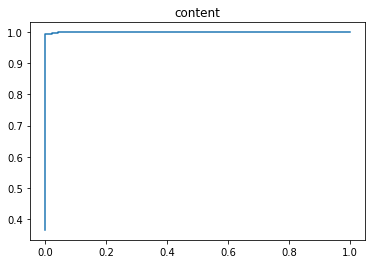

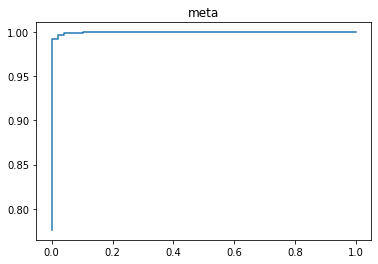

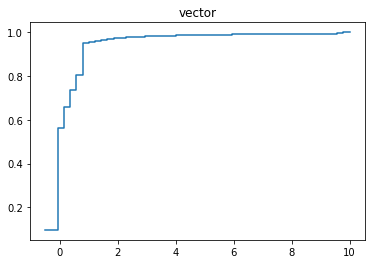

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

content_sample = np.empty(shape=(30*len(df)))
meta_sample = np.empty(shape=(30*len(df)))
vector_sample = np.empty(shape=(3*len(df)))
for idx, row in df.iterrows():
    content_sample[idx*30:(idx+1)*30] = row['content_tfidf']
    meta_sample[idx*30:(idx+1)*30] = row['meta_tfidf']
    vector_sample[idx*3:(idx+1)*3] = row['vectorized_links']

ecdf = sm.distributions.ECDF(content_sample)
content_x = np.linspace(min(content_sample), max(content_sample))
content_y = ecdf(content_x)
plt.figure()
plt.step(content_x, content_y)
plt.title('content')

ecdf = sm.distributions.ECDF(meta_sample)
meta_x = np.linspace(min(meta_sample), max(meta_sample))
meta_y = ecdf(meta_x)
plt.figure()
plt.step(meta_x, meta_y)
plt.title('meta')

ecdf = sm.distributions.ECDF(vector_sample)
vector_x = np.linspace(min(vector_sample), max(vector_sample))
vector_y = ecdf(vector_x)
plt.figure()
plt.step(vector_x, vector_y)
plt.title('vector')

In [39]:
df = df.drop(columns=['log_meta_tfidf'])

In [3]:
df['norm_vectorized_links'] = df.apply(lambda row: np.array(row.vectorized_links)/10, axis=1)

In [4]:
df['norm_combined_features'] = df.apply(lambda row: np.concatenate((row.content_tfidf, row.meta_tfidf, row.norm_vectorized_links), axis=0),axis=1)

In [ ]:
for i in range(20):
    print(f'\ncombined_features: {df["combined_features"][i]}')
    print(f'\nnorm_combined_features: {df["norm_combined_features"][i]}')
df['meta_tfidf'][0].dtype

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.0001


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Pr

      metric  lower_bound      mean  upper_bound
0   accuracy     0.680613  0.689351      0.69809
1         f1     0.000000  0.000000      0.00000
2  precision     0.000000  0.000000      0.00000
3     recall     0.000000  0.000000      0.00000


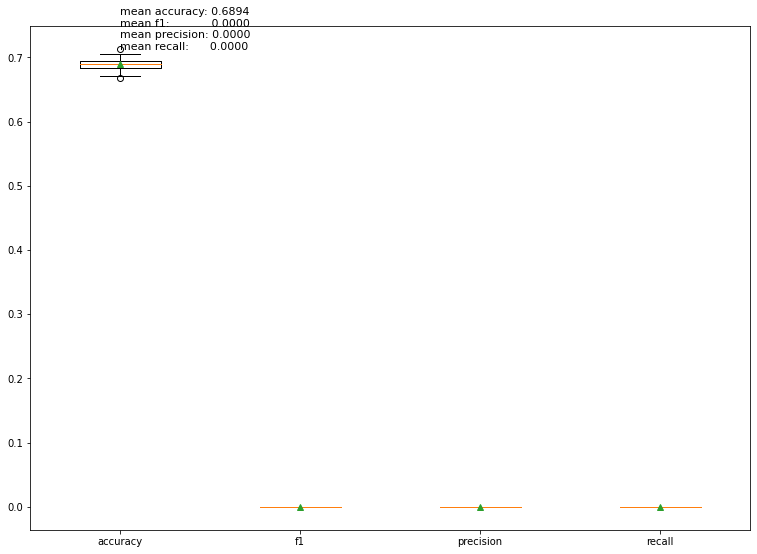

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C = 0.0002


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Pr

      metric  lower_bound      mean  upper_bound
0   accuracy     0.680473  0.688585     0.696698
1         f1     0.000000  0.000000     0.000000
2  precision     0.000000  0.000000     0.000000
3     recall     0.000000  0.000000     0.000000


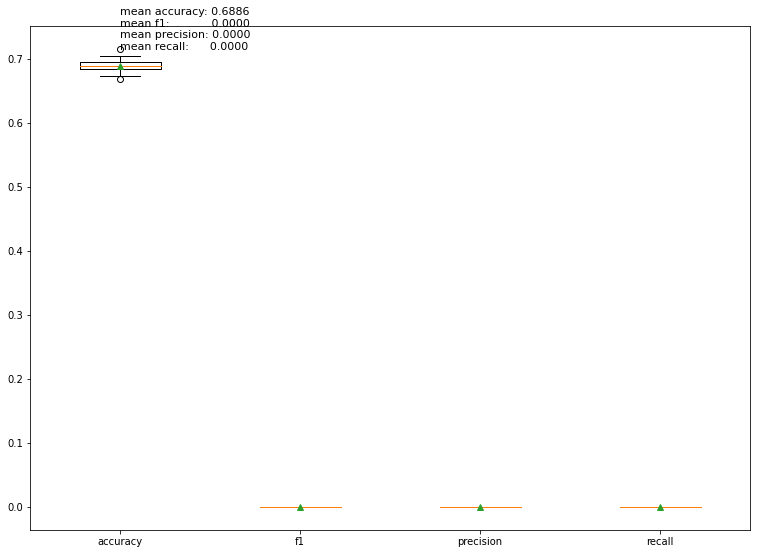

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.00030000000000000003


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▌         | 6/100 [00:00<00:01, 57.14it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

      metric  lower_bound      mean  upper_bound
0   accuracy     0.682129  0.690592     0.699056
1         f1     0.000000  0.000000     0.000000
2  precision     0.000000  0.000000     0.000000
3     recall     0.000000  0.000000     0.000000


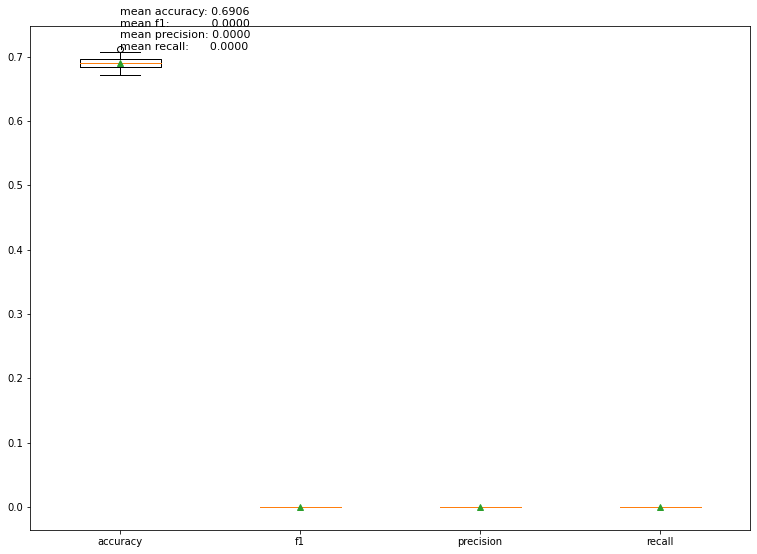

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.0004


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▌         | 6/100 [00:00<00:01, 58.25it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

      metric  lower_bound      mean  upper_bound
0   accuracy     0.680983  0.689408     0.697832
1         f1     0.000000  0.000000     0.000000
2  precision     0.000000  0.000000     0.000000
3     recall     0.000000  0.000000     0.000000


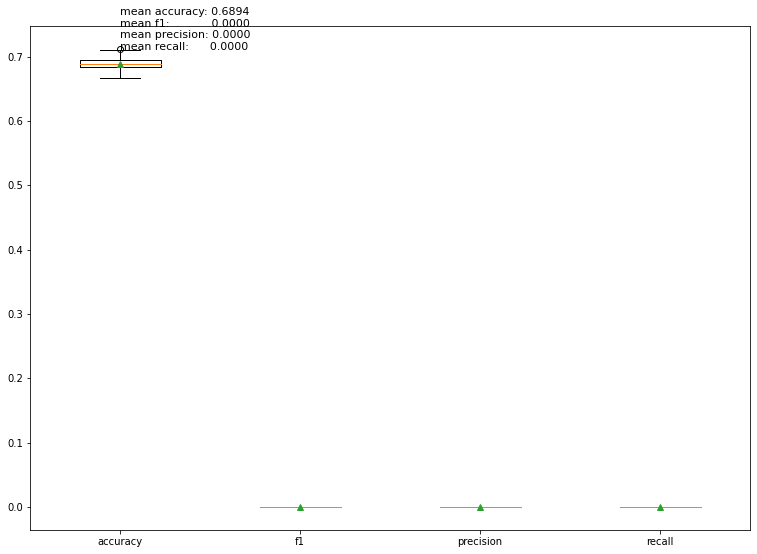

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.0005


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▌         | 6/100 [00:00<00:01, 55.05it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

      metric  lower_bound      mean  upper_bound
0   accuracy     0.679332  0.688381      0.69743
1         f1     0.000000  0.000000      0.00000
2  precision     0.000000  0.000000      0.00000
3     recall     0.000000  0.000000      0.00000


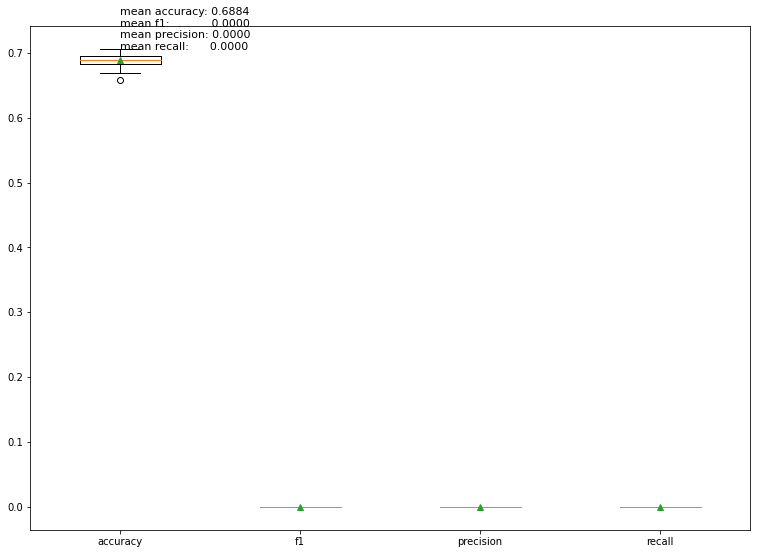

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.0006000000000000001


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▌         | 6/100 [00:00<00:01, 55.05it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

      metric  lower_bound      mean  upper_bound
0   accuracy     0.679121  0.688442     0.697764
1         f1     0.000000  0.000000     0.000000
2  precision     0.000000  0.000000     0.000000
3     recall     0.000000  0.000000     0.000000


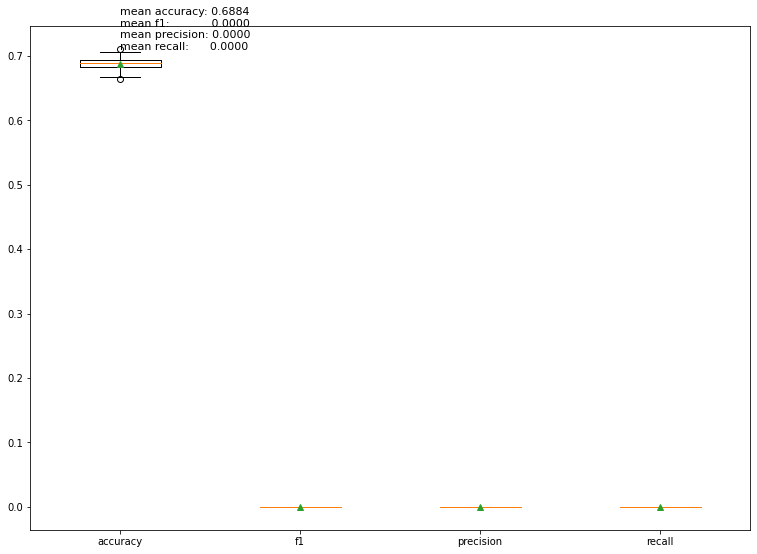

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.0007000000000000001


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Pr

      metric  lower_bound      mean  upper_bound
0   accuracy     0.678699  0.688728     0.698758
1         f1     0.000000  0.000000     0.000000
2  precision     0.000000  0.000000     0.000000
3     recall     0.000000  0.000000     0.000000


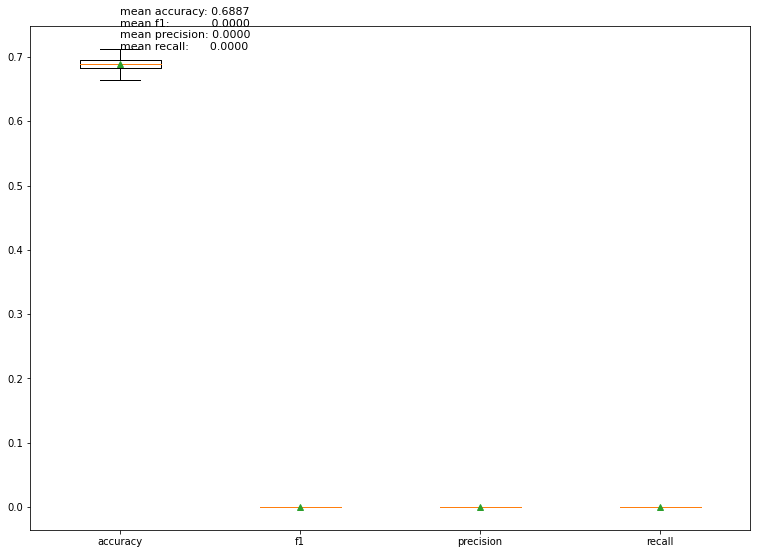

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.0008


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▌         | 6/100 [00:00<00:01, 58.25it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

      metric  lower_bound      mean  upper_bound
0   accuracy     0.680953  0.689847      0.69874
1         f1     0.000000  0.000000      0.00000
2  precision     0.000000  0.000000      0.00000
3     recall     0.000000  0.000000      0.00000


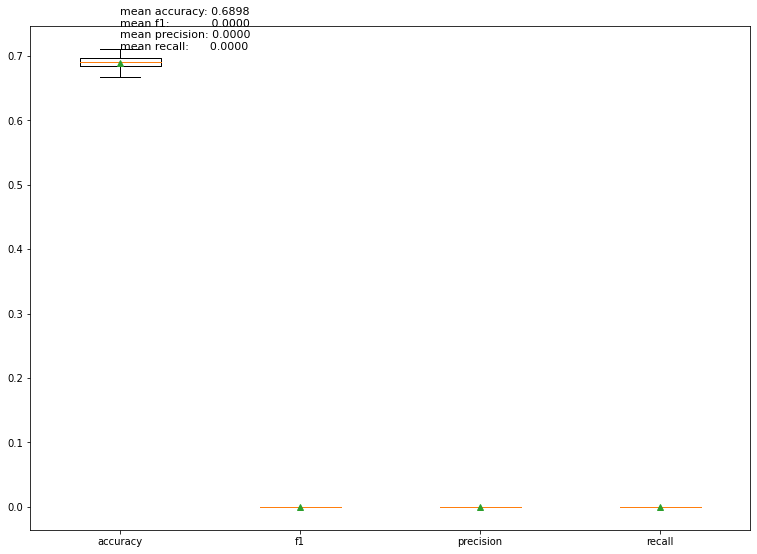

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.0009000000000000001


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▌         | 6/100 [00:00<00:01, 55.56it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

KeyboardInterrupt: 

In [9]:
from analysis_functions import confidence_interval_logistic_regression_combined

df['content_meta_combined'] = df.apply(lambda row: np.concatenate((row.content_tfidf, row.meta_tfidf), axis=0),axis=1)

for C in list(np.arange(0.0001, 0.001, 0.0001)):
    print(f'C = {C}')
    results = confidence_interval_logistic_regression_combined(num_iterations=100, df=df, col='content_meta_combined', C=C)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

C = 0.048113134154685655


C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Pr

      metric  lower_bound      mean  upper_bound
0   accuracy     0.680366  0.689096     0.697826
1         f1     0.000000  0.000000     0.000000
2  precision     0.000000  0.000000     0.000000
3     recall     0.000000  0.000000     0.000000


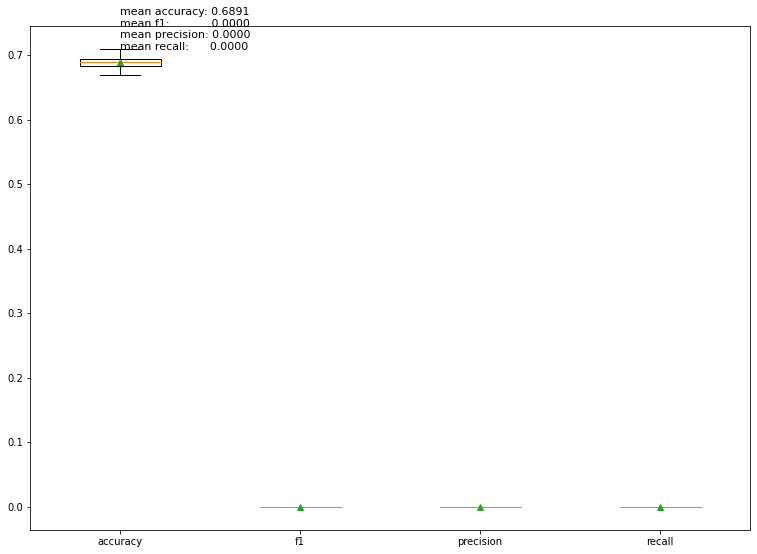

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.09854114198755815


 35%|███▌      | 35/100 [00:00<00:01, 42.94it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 100/100 [00:02<00:00, 43.40it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.678744  0.695245     0.711746
1         f1    -0.007056  0.041197     0.089451
2  precision     0.882935  0.984469     1.086004
3     recall    -0.004406  0.021681     0.047769


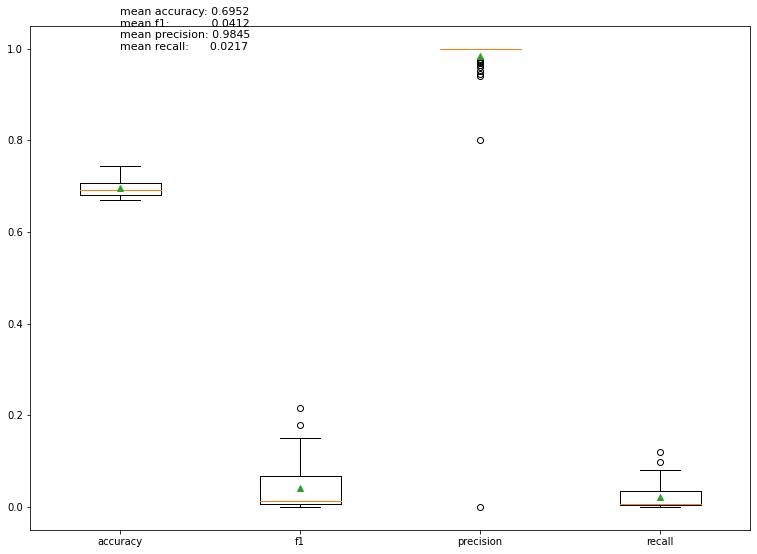

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.1513953993264474


100%|██████████| 100/100 [00:02<00:00, 43.09it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.862192  0.871287     0.880382
1         f1     0.721314  0.738357     0.755400
2  precision     0.998175  0.999355     1.000536
3     recall     0.564384  0.585746     0.607108


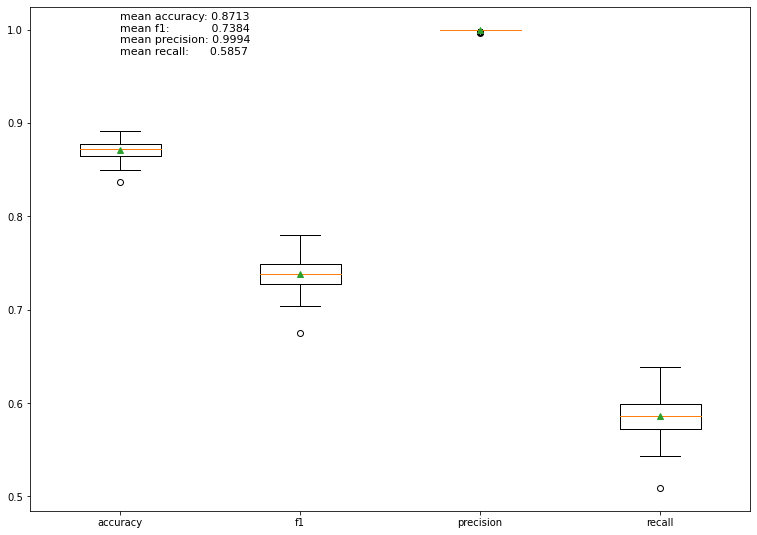

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.20679264063932856


100%|██████████| 100/100 [00:02<00:00, 43.71it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.894258  0.901348     0.908438
1         f1     0.799448  0.811805     0.824161
2  precision     0.997304  0.998802     1.000300
3     recall     0.666480  0.683969     0.701459


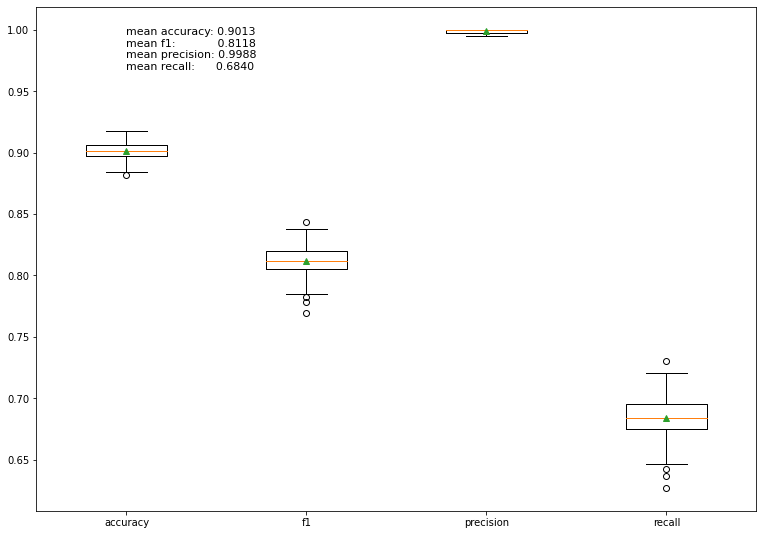

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.264855216855296


100%|██████████| 100/100 [00:02<00:00, 42.47it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.908643  0.914780     0.920918
1         f1     0.830220  0.841418     0.852617
2  precision     0.988457  0.994132     0.999807
3     recall     0.712091  0.729587     0.747084


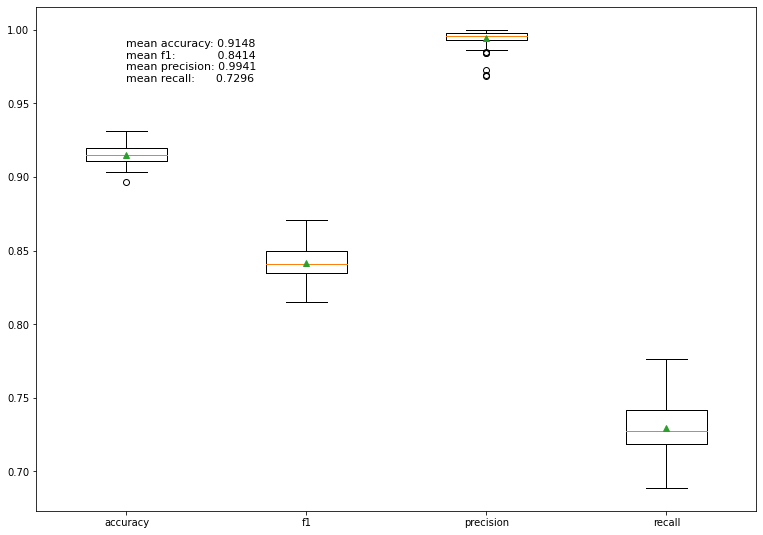

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.32571136559010916


100%|██████████| 100/100 [00:02<00:00, 42.50it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.908657  0.913744     0.918830
1         f1     0.834632  0.844437     0.854242
2  precision     0.941430  0.958271     0.975112
3     recall     0.740722  0.755048     0.769375


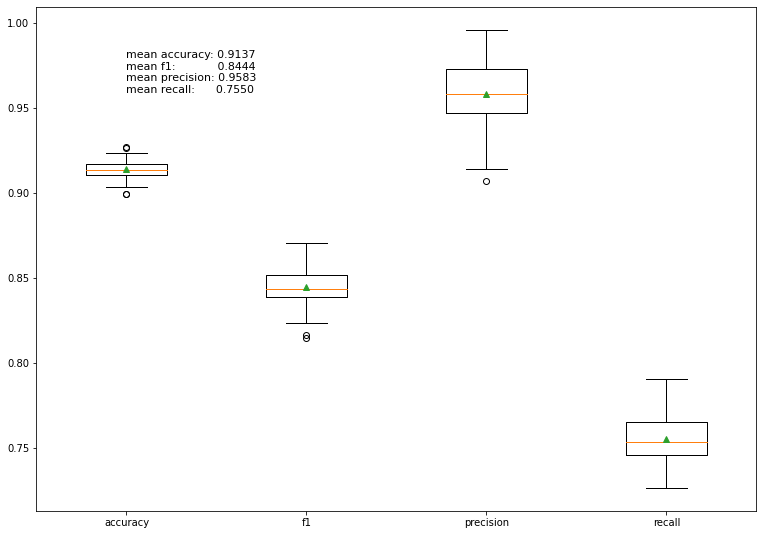

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.3894954943731377


100%|██████████| 100/100 [00:02<00:00, 42.72it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.907998  0.913463     0.918927
1         f1     0.835970  0.846465     0.856961
2  precision     0.925867  0.940850     0.955833
3     recall     0.756245  0.769462     0.782680


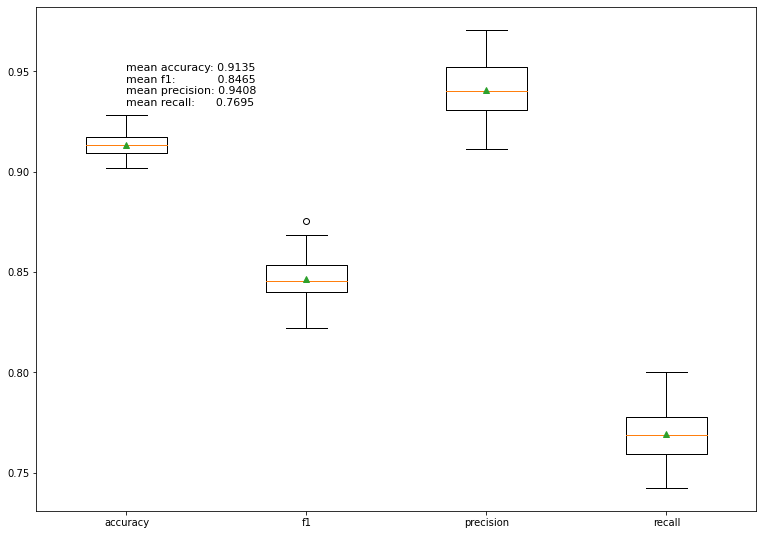

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.45634847750124385


100%|██████████| 100/100 [00:02<00:00, 43.14it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.905652  0.911430     0.917208
1         f1     0.833299  0.844366     0.855434
2  precision     0.916301  0.928775     0.941249
3     recall     0.758169  0.774227     0.790285


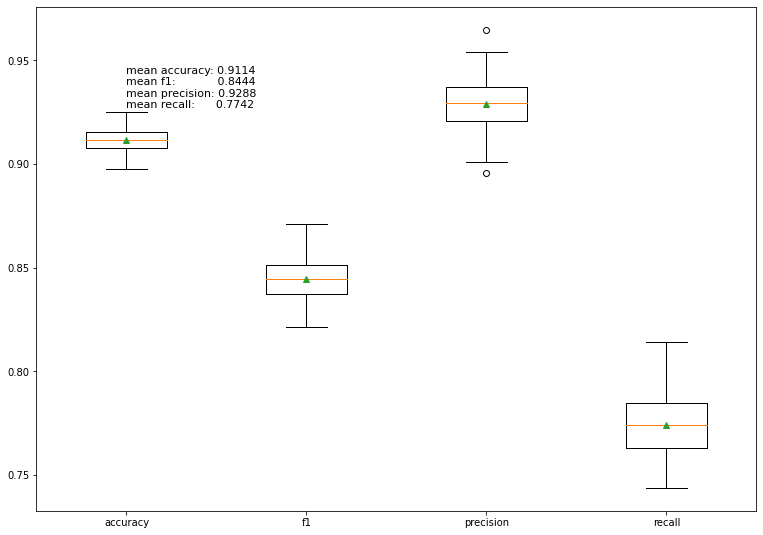

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.5264179671752334


100%|██████████| 100/100 [00:02<00:00, 43.02it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.905729  0.911226     0.916722
1         f1     0.834926  0.845285     0.855643
2  precision     0.913057  0.923317     0.933577
3     recall     0.764227  0.779581     0.794936


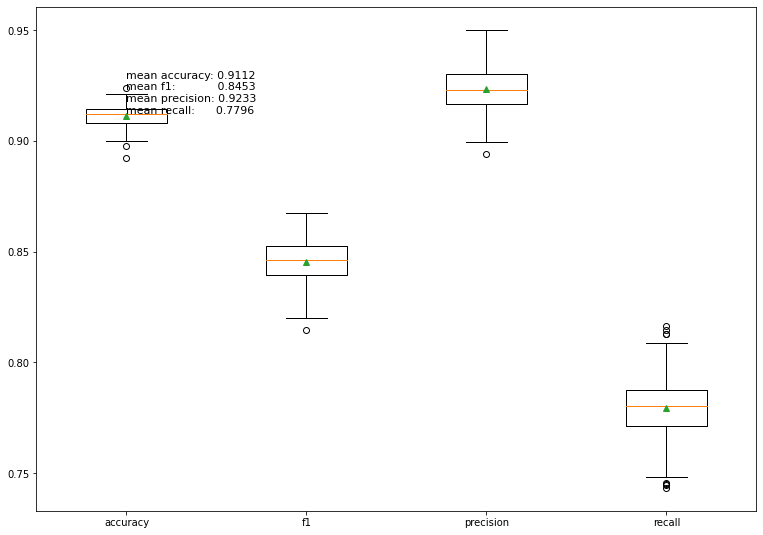

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.5998587196060581


100%|██████████| 100/100 [00:02<00:00, 43.54it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.906588  0.911818     0.917049
1         f1     0.835699  0.845520     0.855340
2  precision     0.910118  0.921512     0.932906
3     recall     0.767506  0.781255     0.795003


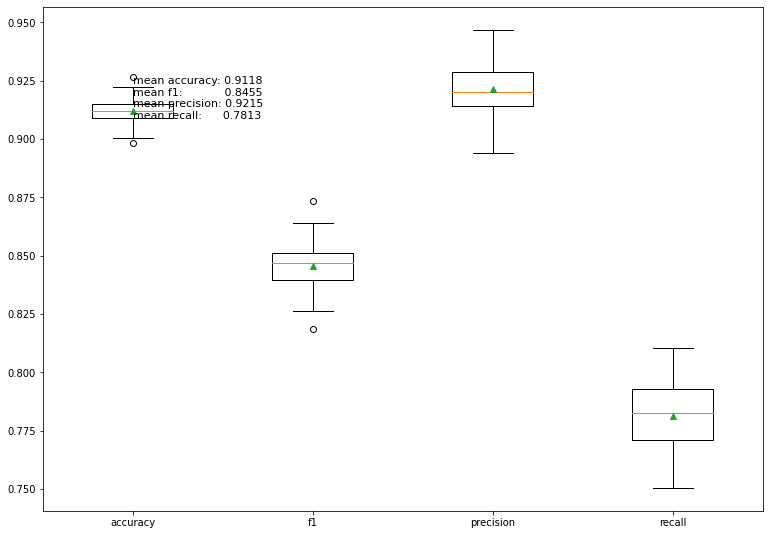

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.676832936811008


100%|██████████| 100/100 [00:02<00:00, 44.72it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.905932  0.911348     0.916765
1         f1     0.836701  0.845487     0.854273
2  precision     0.909913  0.921235     0.932557
3     recall     0.768354  0.781412     0.794470


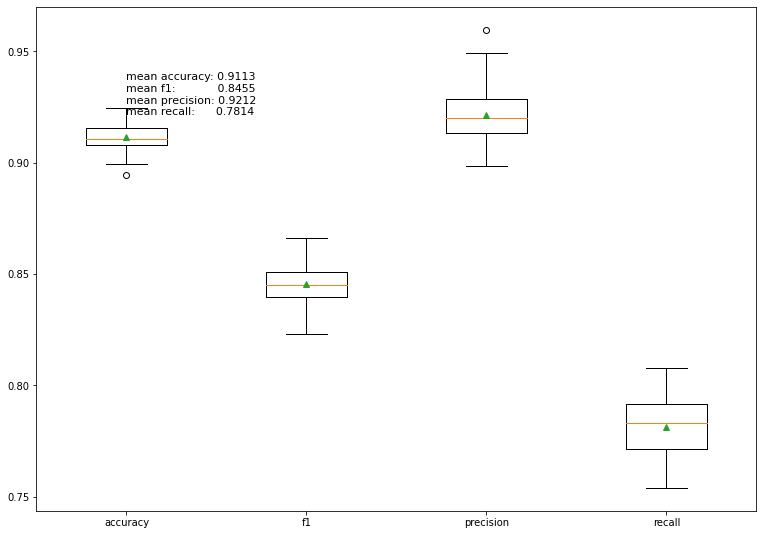

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.7575106248547918


100%|██████████| 100/100 [00:02<00:00, 44.76it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.907568  0.912533     0.917498
1         f1     0.839152  0.848228     0.857304
2  precision     0.912047  0.922197     0.932347
3     recall     0.772521  0.785369     0.798217


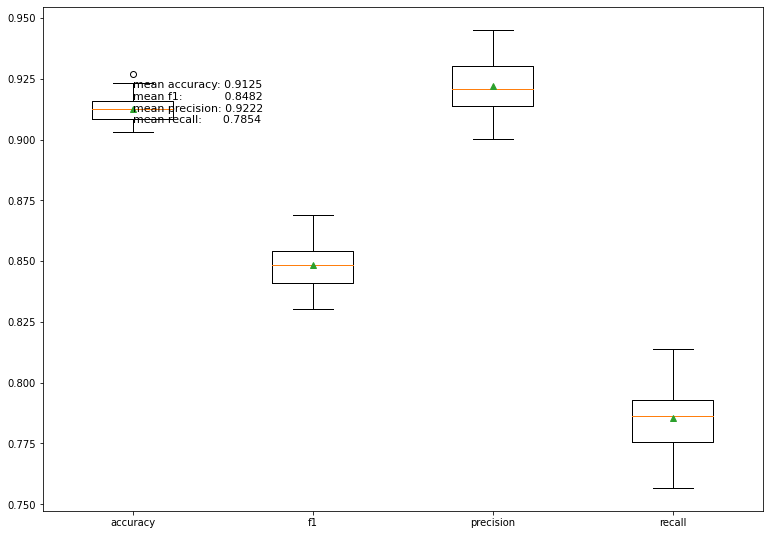

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.842069969326716


100%|██████████| 100/100 [00:02<00:00, 41.69it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.907516  0.912957     0.918398
1         f1     0.839547  0.848955     0.858363
2  precision     0.912303  0.922878     0.933453
3     recall     0.772423  0.786146     0.799869


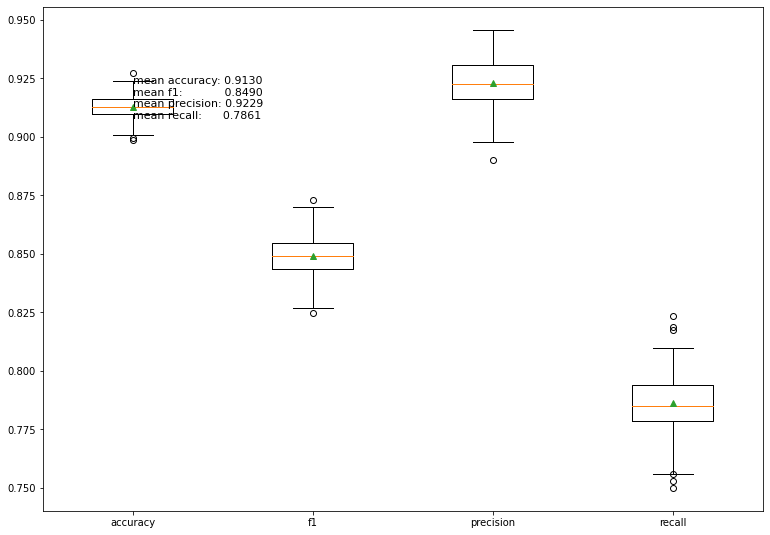

  0%|          | 0/100 [00:00<?, ?it/s]

C = 0.9306977288832501


100%|██████████| 100/100 [00:02<00:00, 40.58it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.906692  0.912002     0.917312
1         f1     0.836716  0.846656     0.856596
2  precision     0.907401  0.919209     0.931016
3     recall     0.770074  0.784911     0.799748


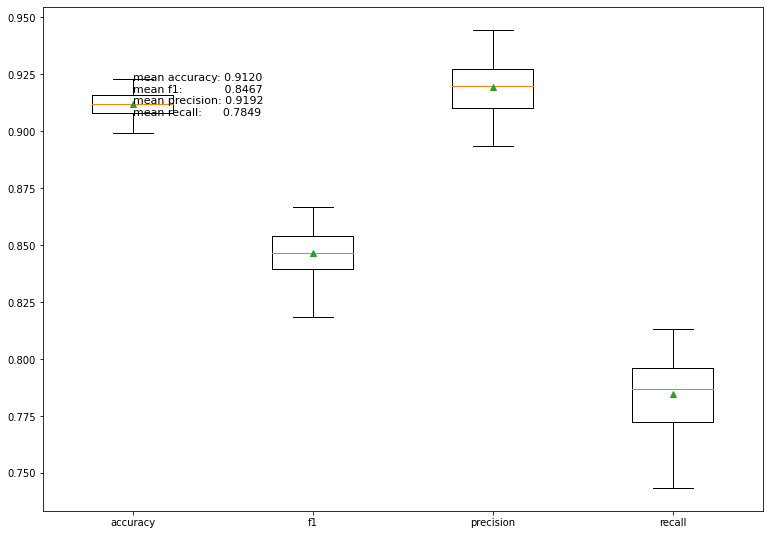

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.023589647725157


100%|██████████| 100/100 [00:02<00:00, 40.40it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.907465  0.912390     0.917316
1         f1     0.839241  0.847983     0.856725
2  precision     0.910152  0.920466     0.930779
3     recall     0.772274  0.786261     0.800249


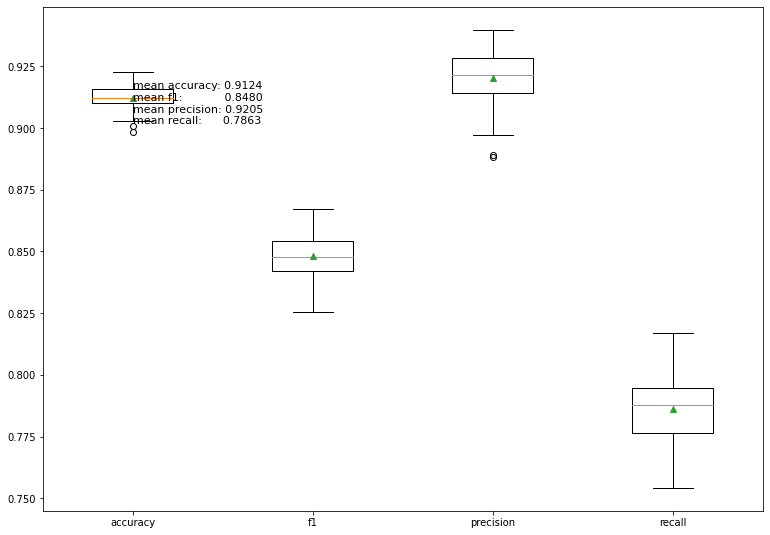

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.1209508879201908


100%|██████████| 100/100 [00:02<00:00, 40.51it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.906826  0.912007     0.917189
1         f1     0.837514  0.846808     0.856101
2  precision     0.910429  0.920384     0.930340
3     recall     0.770906  0.784255     0.797604


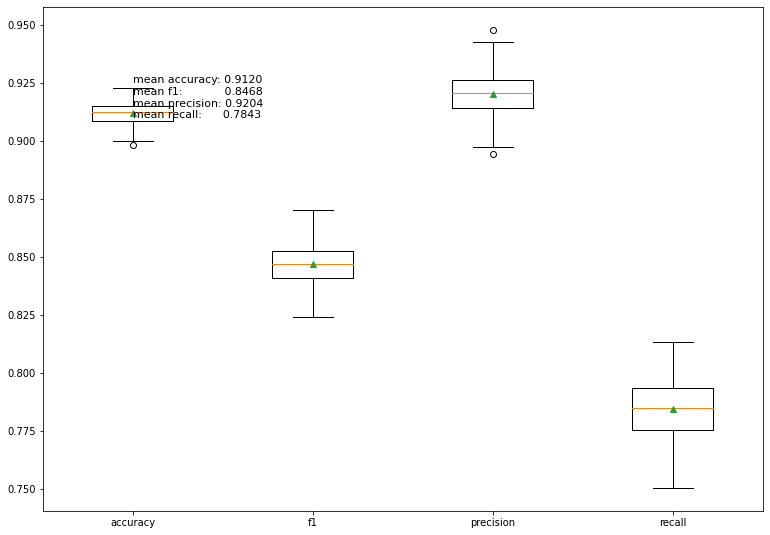

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.2229964825261948


100%|██████████| 100/100 [00:02<00:00, 40.19it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.908592  0.913641     0.918691
1         f1     0.841930  0.850362     0.858794
2  precision     0.912568  0.923069     0.933569
3     recall     0.776678  0.788390     0.800102


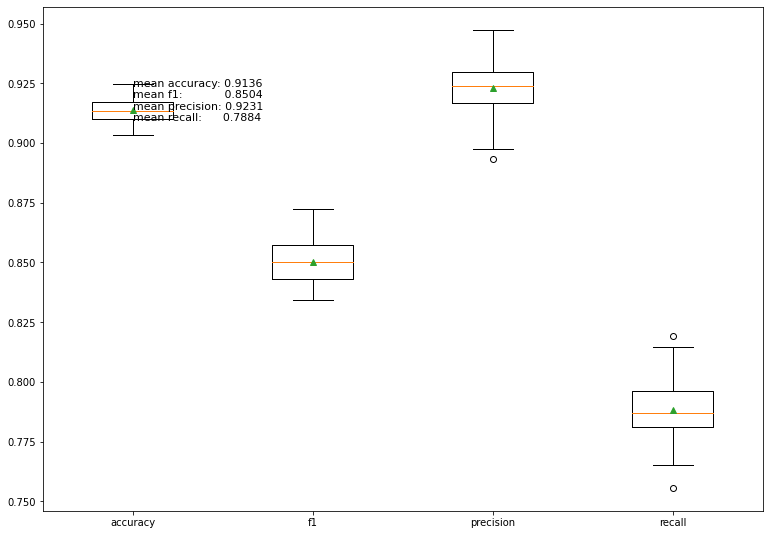

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.329951810515372


100%|██████████| 100/100 [00:02<00:00, 40.73it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.907745  0.914132     0.920519
1         f1     0.839613  0.850591     0.861569
2  precision     0.912134  0.922423     0.932713
3     recall     0.774133  0.789268     0.804402


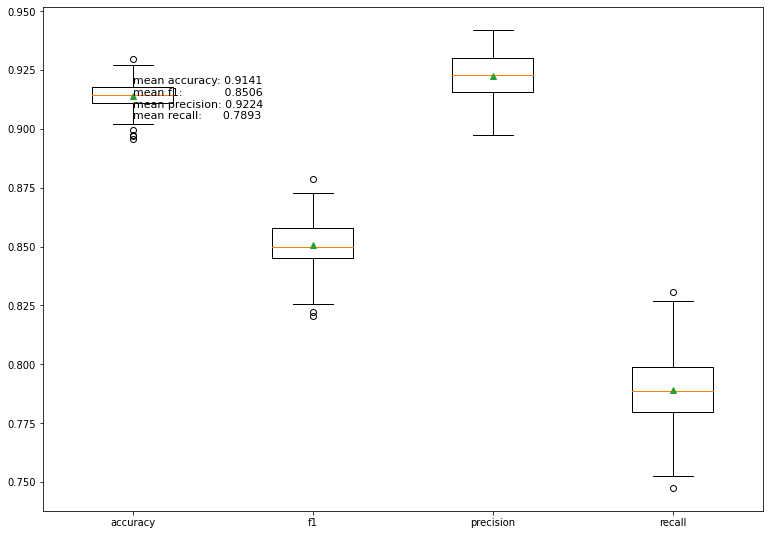

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.4420530945486512


100%|██████████| 100/100 [00:02<00:00, 40.85it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.909239  0.914316     0.919393
1         f1     0.842173  0.851364     0.860555
2  precision     0.912389  0.923124     0.933859
3     recall     0.776420  0.790113     0.803806


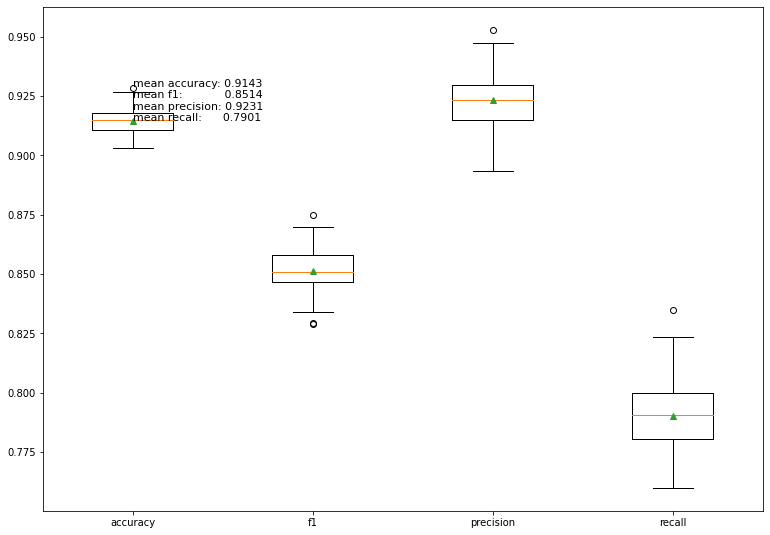

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.5595479226995357


100%|██████████| 100/100 [00:02<00:00, 39.96it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.909446  0.915286     0.921126
1         f1     0.842969  0.853349     0.863728
2  precision     0.909750  0.922191     0.934633
3     recall     0.779696  0.794243     0.808790


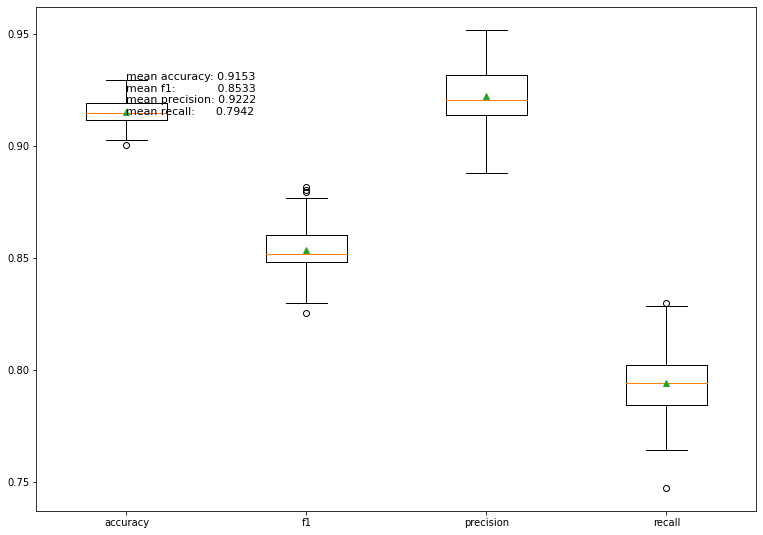

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.6826957952797255


100%|██████████| 100/100 [00:02<00:00, 39.24it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.909833  0.915368     0.920902
1         f1     0.843372  0.853345     0.863318
2  precision     0.912852  0.923875     0.934899
3     recall     0.778610  0.792975     0.807341


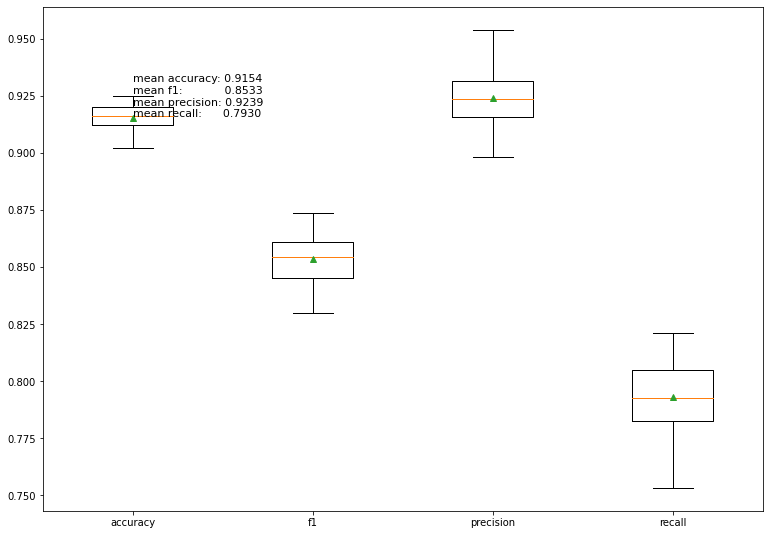

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.8117686979742302


100%|██████████| 100/100 [00:02<00:00, 39.42it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.909550  0.914934     0.920317
1         f1     0.842480  0.852397     0.862314
2  precision     0.914515  0.924880     0.935244
3     recall     0.775898  0.790610     0.805322


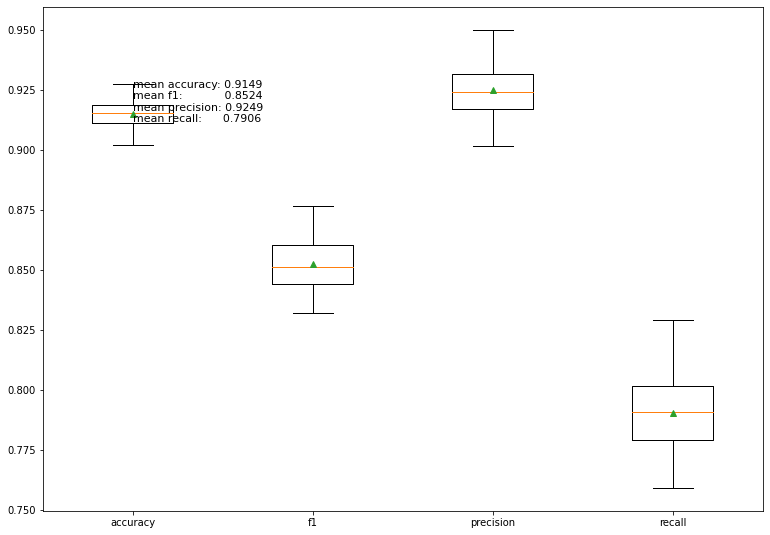

  0%|          | 0/100 [00:00<?, ?it/s]

C = 1.9470517025518106


100%|██████████| 100/100 [00:02<00:00, 38.96it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.909395  0.915163     0.920932
1         f1     0.842173  0.852801     0.863429
2  precision     0.912727  0.924782     0.936836
3     recall     0.777775  0.791336     0.804897


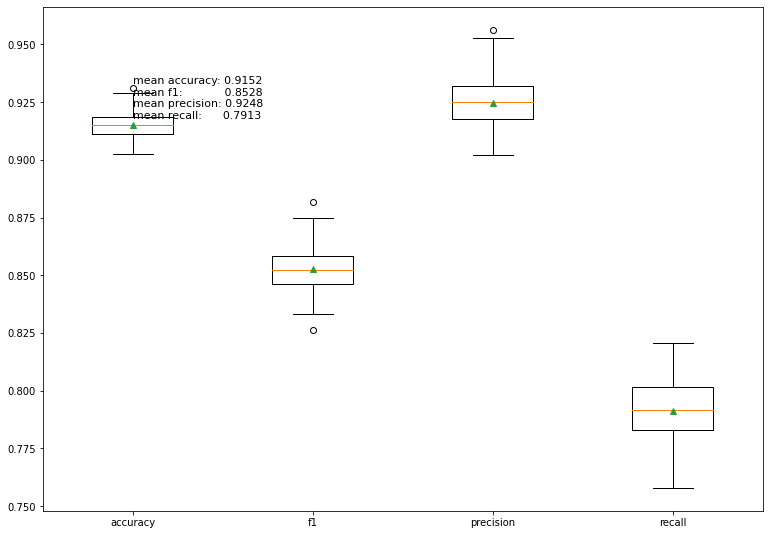

  0%|          | 0/100 [00:00<?, ?it/s]

C = 2.088843596477481


100%|██████████| 100/100 [00:02<00:00, 39.02it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.910624  0.916803     0.922982
1         f1     0.845075  0.855754     0.866434
2  precision     0.917936  0.931123     0.944309
3     recall     0.777139  0.791852     0.806564


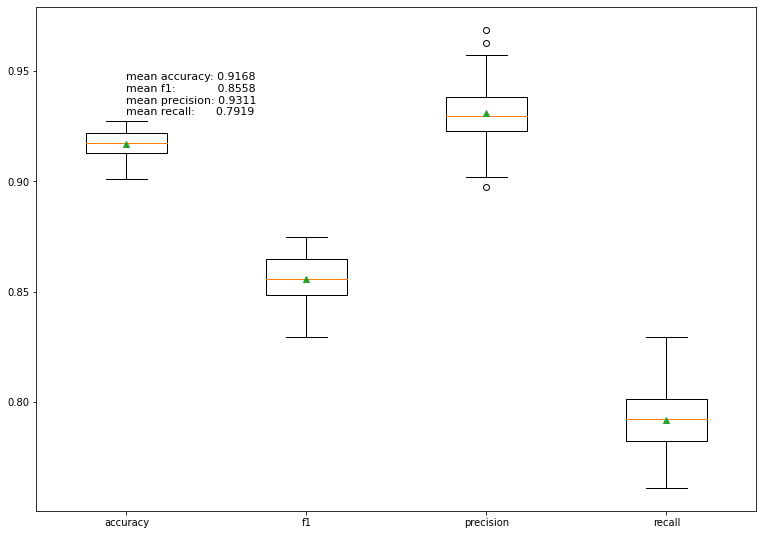

  0%|          | 0/100 [00:00<?, ?it/s]

C = 2.237457542817644


100%|██████████| 100/100 [00:02<00:00, 39.48it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.910655  0.916604     0.922553
1         f1     0.844301  0.855056     0.865811
2  precision     0.918778  0.932003     0.945228
3     recall     0.776314  0.789985     0.803656


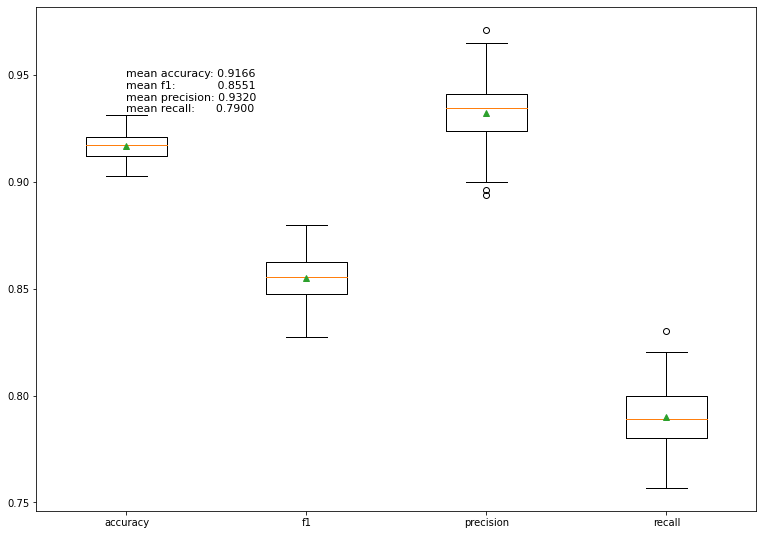

  4%|▍         | 4/100 [00:00<00:02, 39.60it/s]

C = 2.393221771895328


100%|██████████| 100/100 [00:02<00:00, 39.34it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.912166  0.918519     0.924872
1         f1     0.846706  0.857736     0.868766
2  precision     0.922436  0.937777     0.953118
3     recall     0.775419  0.790510     0.805601


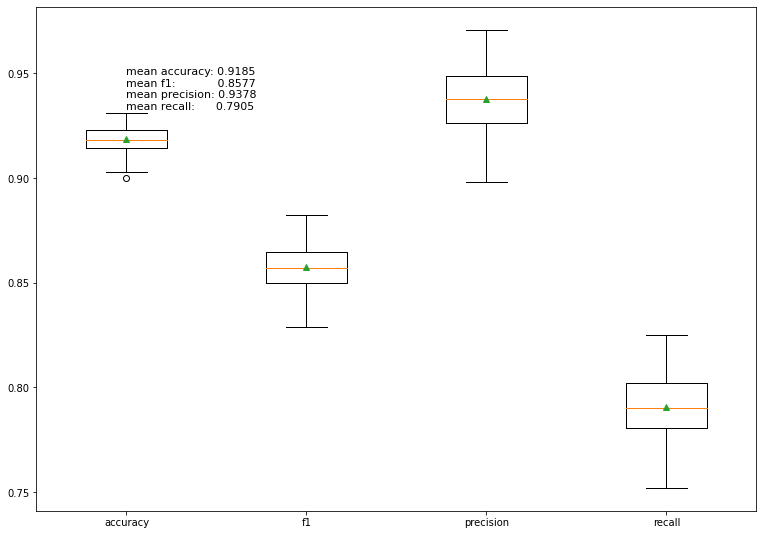

  0%|          | 0/100 [00:00<?, ?it/s]

C = 2.5564803062231287


100%|██████████| 100/100 [00:02<00:00, 38.68it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.913473  0.919459     0.925445
1         f1     0.848014  0.858942     0.869870
2  precision     0.921853  0.937658     0.953462
3     recall     0.779935  0.792573     0.805212


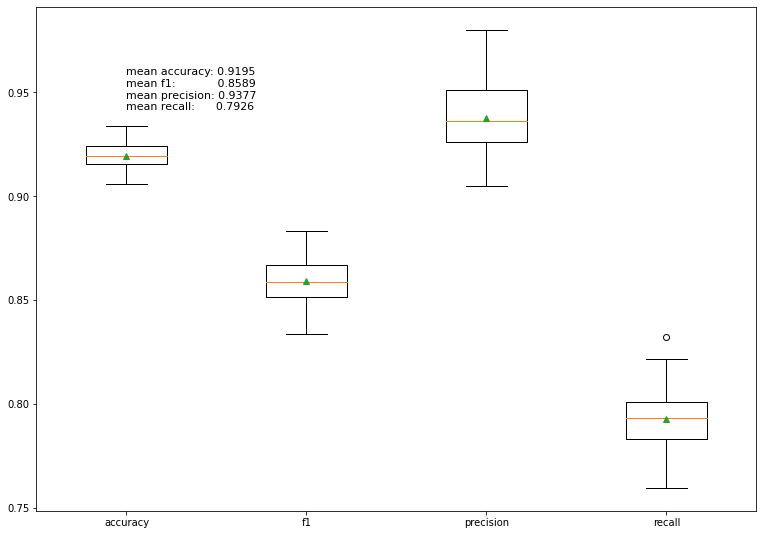

  0%|          | 0/100 [00:00<?, ?it/s]

C = 2.72759372031494


100%|██████████| 100/100 [00:02<00:00, 38.20it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.912958  0.919714     0.926470
1         f1     0.846874  0.859178     0.871483
2  precision     0.926954  0.941082     0.955211
3     recall     0.775218  0.790540     0.805861


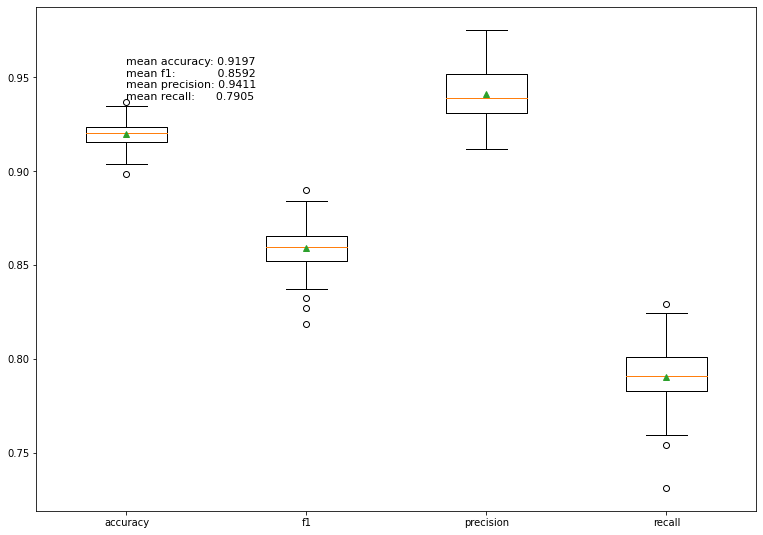

  0%|          | 0/100 [00:00<?, ?it/s]

C = 2.906939937054617


100%|██████████| 100/100 [00:02<00:00, 38.10it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.915437  0.921399     0.927362
1         f1     0.850755  0.861766     0.872778
2  precision     0.933714  0.948307     0.962901
3     recall     0.776244  0.789856     0.803467


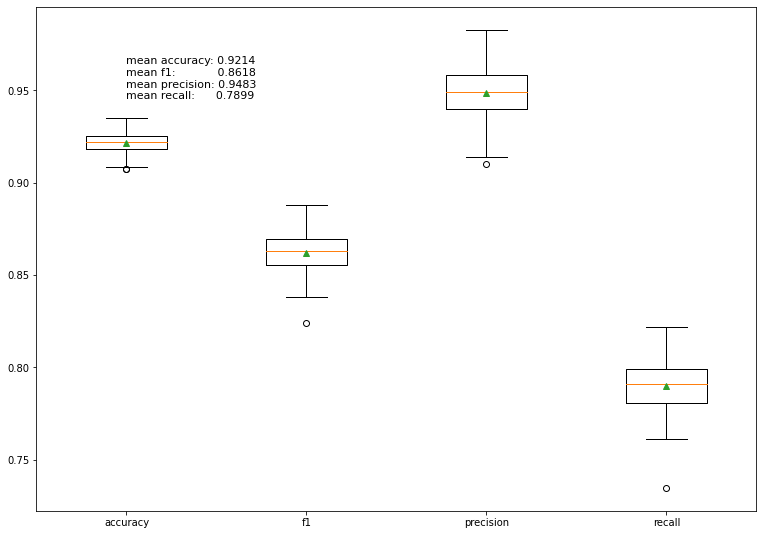

  0%|          | 0/100 [00:00<?, ?it/s]

C = 3.0949150623804247


100%|██████████| 100/100 [00:02<00:00, 38.29it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.915651  0.922298     0.928946
1         f1     0.851794  0.862979     0.874163
2  precision     0.938779  0.953072     0.967365
3     recall     0.774332  0.788611     0.802890


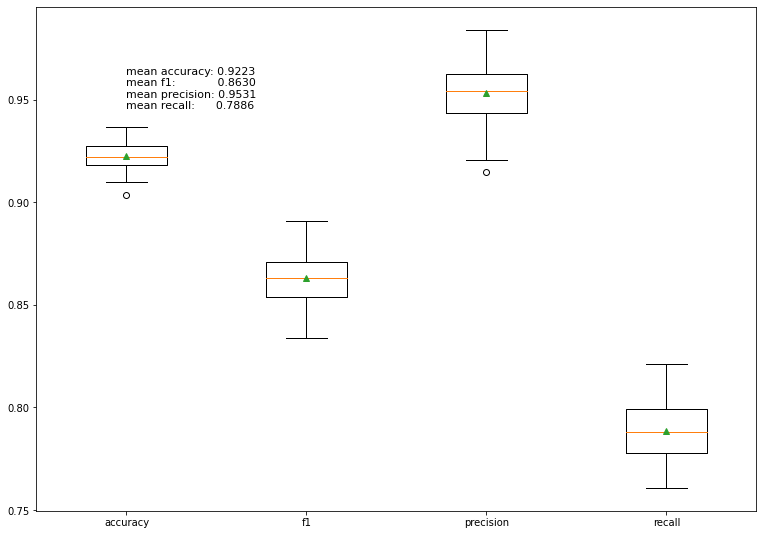

  4%|▍         | 4/100 [00:00<00:02, 37.04it/s]

C = 3.2919342601287775


100%|██████████| 100/100 [00:02<00:00, 38.18it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.916665  0.923304     0.929944
1         f1     0.851589  0.864279     0.876970
2  precision     0.940117  0.956869     0.973621
3     recall     0.773231  0.788202     0.803172


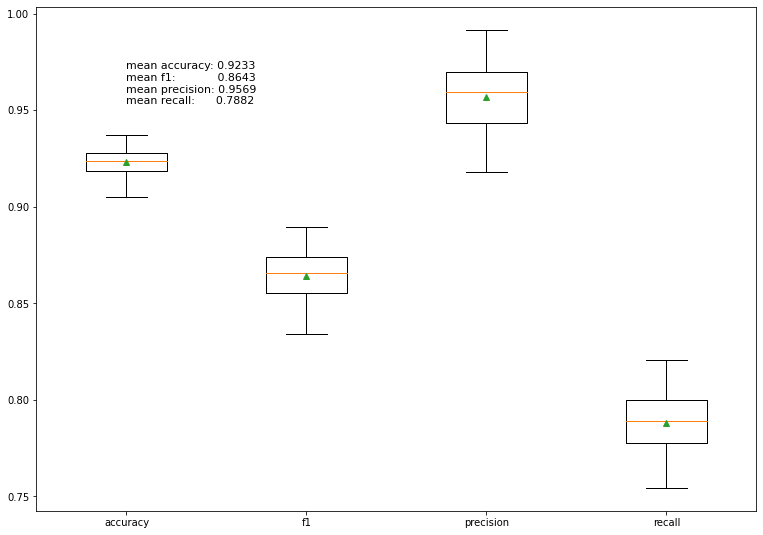

  4%|▍         | 4/100 [00:00<00:02, 38.10it/s]

C = 3.4984326689694454


100%|██████████| 100/100 [00:02<00:00, 37.75it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.918179  0.924300     0.930421
1         f1     0.854904  0.866082     0.877259
2  precision     0.950737  0.965563     0.980389
3     recall     0.772181  0.785319     0.798456


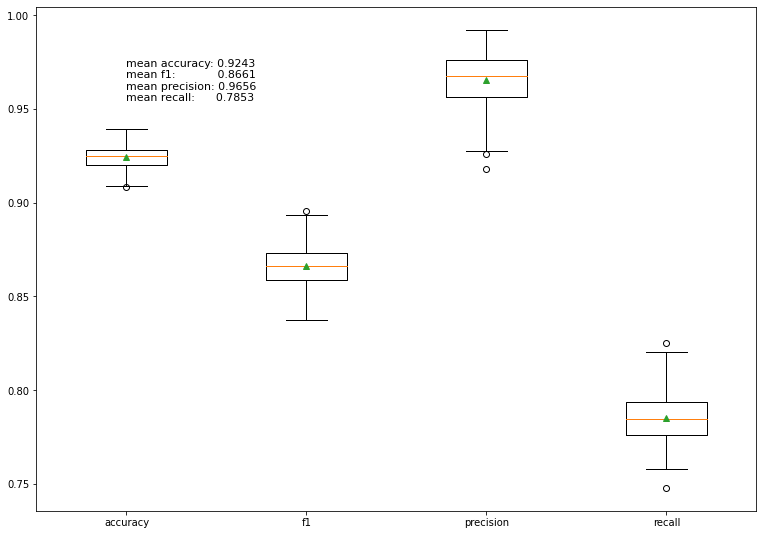

  0%|          | 0/100 [00:00<?, ?it/s]

C = 3.7148663634573937


100%|██████████| 100/100 [00:02<00:00, 39.77it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.921050  0.926359     0.931667
1         f1     0.858921  0.869113     0.879306
2  precision     0.955248  0.969326     0.983405
3     recall     0.773939  0.787864     0.801790


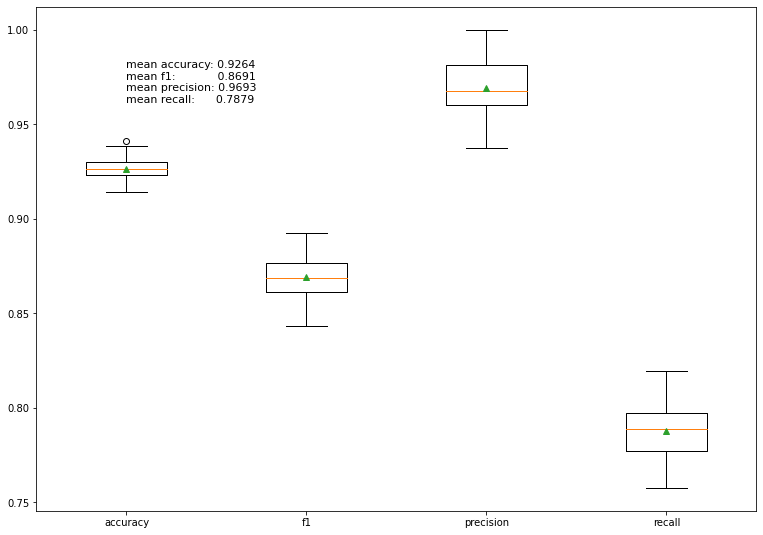

  4%|▍         | 4/100 [00:00<00:02, 39.22it/s]

C = 3.941713361323834


100%|██████████| 100/100 [00:02<00:00, 39.46it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.922084  0.927375     0.932666
1         f1     0.860851  0.870678     0.880504
2  precision     0.962329  0.974732     0.987136
3     recall     0.773193  0.786857     0.800520


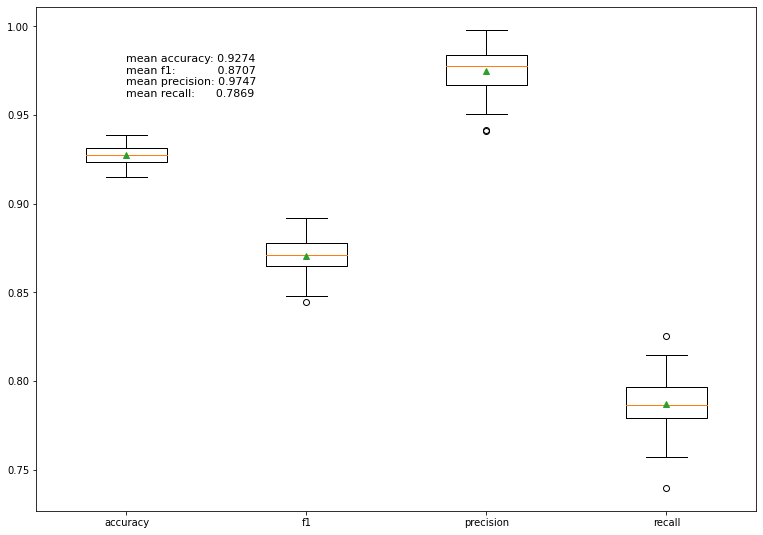

  0%|          | 0/100 [00:00<?, ?it/s]

C = 4.17947467923121


100%|██████████| 100/100 [00:02<00:00, 38.31it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.920906  0.926629     0.932352
1         f1     0.858650  0.868796     0.878943
2  precision     0.963671  0.976643     0.989615
3     recall     0.767155  0.782623     0.798090


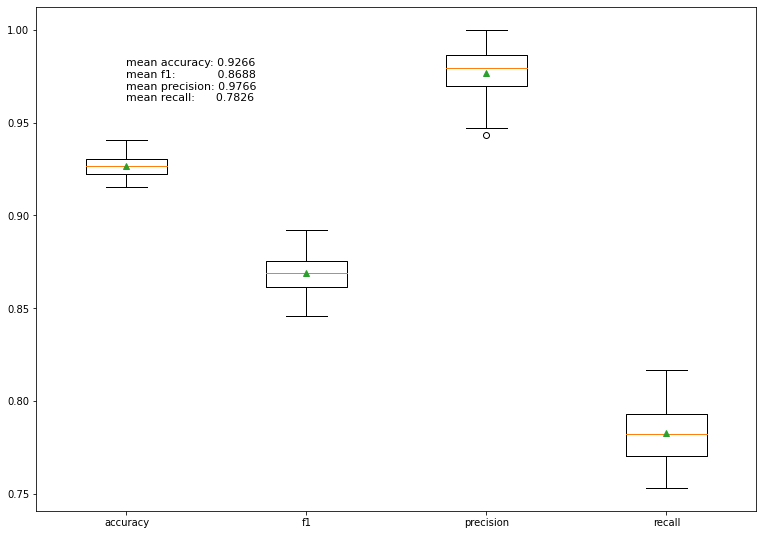

  0%|          | 0/100 [00:00<?, ?it/s]

C = 4.428675439323859


100%|██████████| 100/100 [00:02<00:00, 38.71it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.922566  0.928478     0.934391
1         f1     0.861769  0.872285     0.882801
2  precision     0.972091  0.981644     0.991197
3     recall     0.768876  0.785038     0.801199


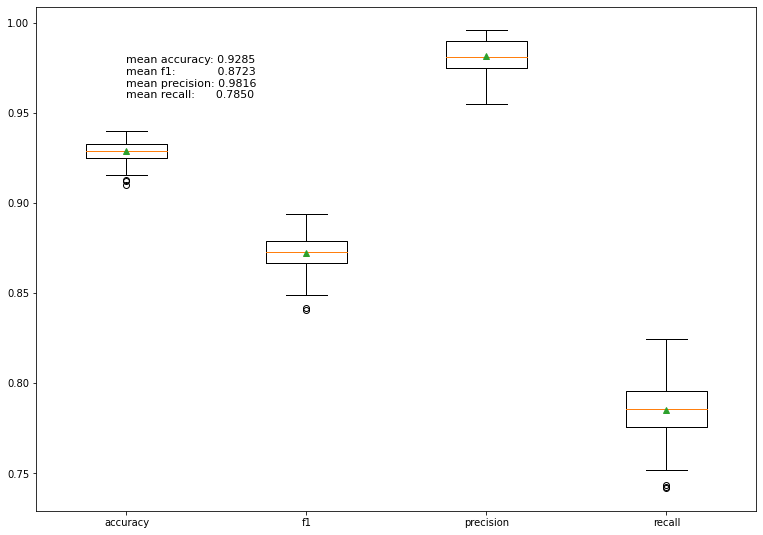

  0%|          | 0/100 [00:00<?, ?it/s]

C = 4.689866029018296


100%|██████████| 100/100 [00:02<00:00, 39.04it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.923532  0.928601     0.933669
1         f1     0.861641  0.871601     0.881561
2  precision     0.975284  0.984518     0.993753
3     recall     0.766883  0.782088     0.797293


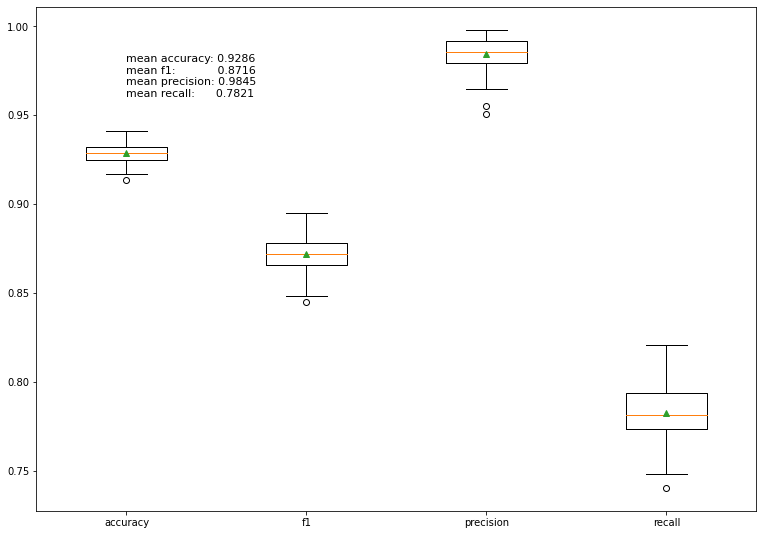

  0%|          | 0/100 [00:00<?, ?it/s]

C = 4.963623316594643


100%|██████████| 100/100 [00:02<00:00, 38.97it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.924410  0.929530     0.934651
1         f1     0.864109  0.873652     0.883195
2  precision     0.980258  0.987422     0.994586
3     recall     0.768718  0.783536     0.798355


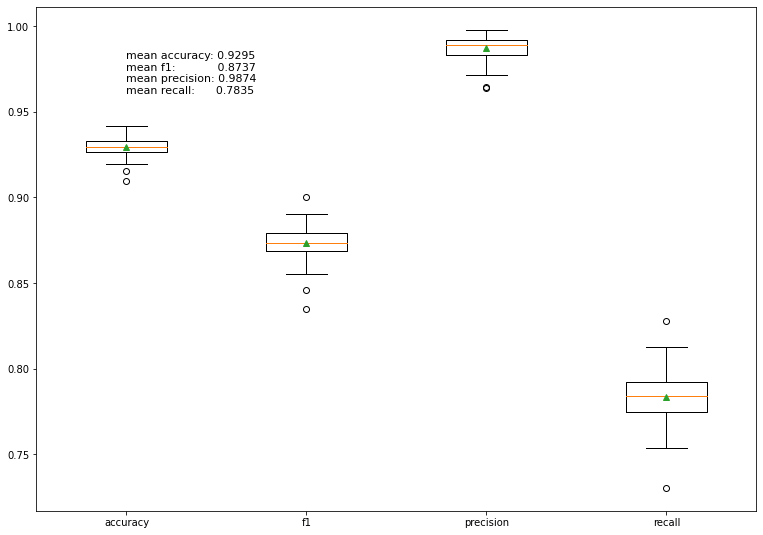

  0%|          | 0/100 [00:00<?, ?it/s]

C = 5.250551925273971


100%|██████████| 100/100 [00:02<00:00, 39.05it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.925235  0.930148     0.935062
1         f1     0.865128  0.874152     0.883177
2  precision     0.981735  0.988731     0.995727
3     recall     0.769379  0.783508     0.797638


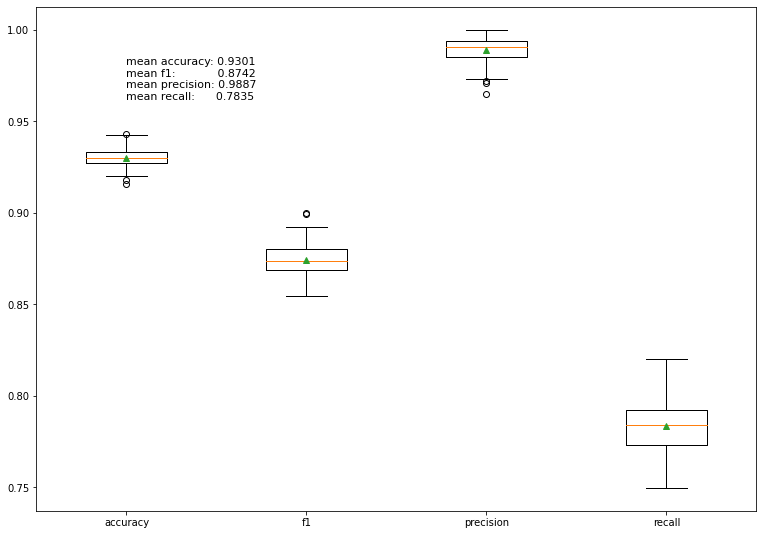

  4%|▍         | 4/100 [00:00<00:02, 38.83it/s]

C = 5.551285568595508


100%|██████████| 100/100 [00:02<00:00, 38.68it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.924030  0.929418     0.934805
1         f1     0.863361  0.873111     0.882862
2  precision     0.986191  0.991371     0.996550
3     recall     0.764230  0.780229     0.796227


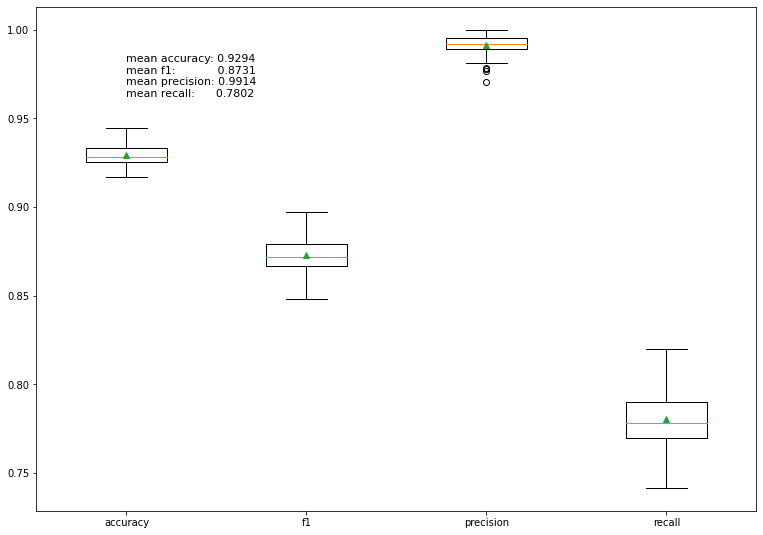

  0%|          | 0/100 [00:00<?, ?it/s]

C = 5.866488450043


100%|██████████| 100/100 [00:02<00:00, 39.43it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.923747  0.929367     0.934986
1         f1     0.862538  0.872438     0.882338
2  precision     0.986880  0.991848     0.996816
3     recall     0.763131  0.778843     0.794555


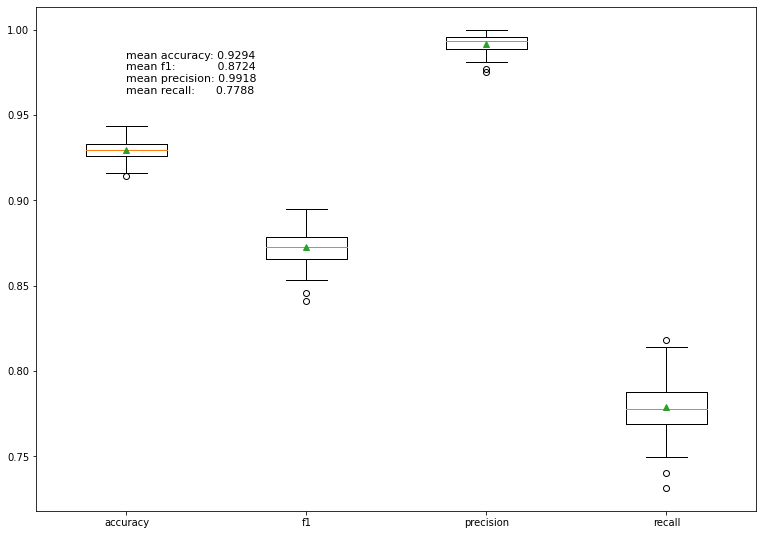

  0%|          | 0/100 [00:00<?, ?it/s]

C = 6.196856730011519


100%|██████████| 100/100 [00:02<00:00, 37.79it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.924689  0.929694     0.934698
1         f1     0.864334  0.873553     0.882772
2  precision     0.989027  0.993164     0.997300
3     recall     0.764943  0.779794     0.794644


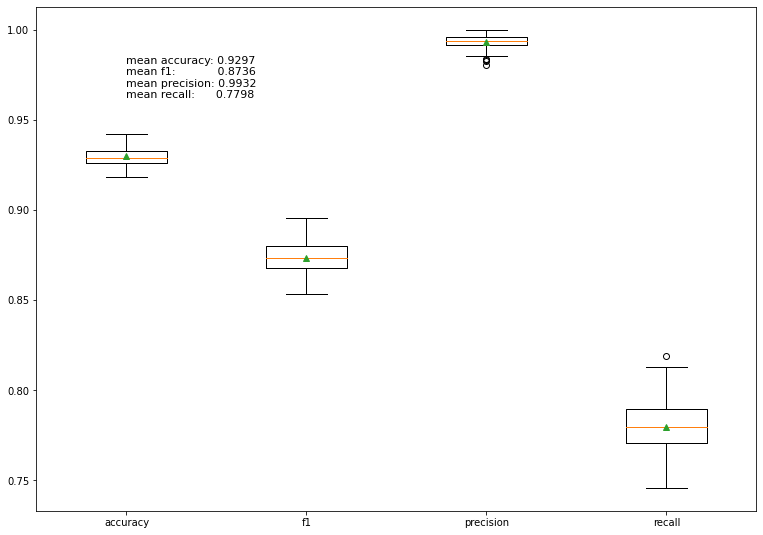

  0%|          | 0/100 [00:00<?, ?it/s]

C = 6.543120063354617


100%|██████████| 100/100 [00:02<00:00, 36.51it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.924992  0.930133     0.935274
1         f1     0.865359  0.874625     0.883891
2  precision     0.989970  0.993696     0.997421
3     recall     0.766301  0.781172     0.796044


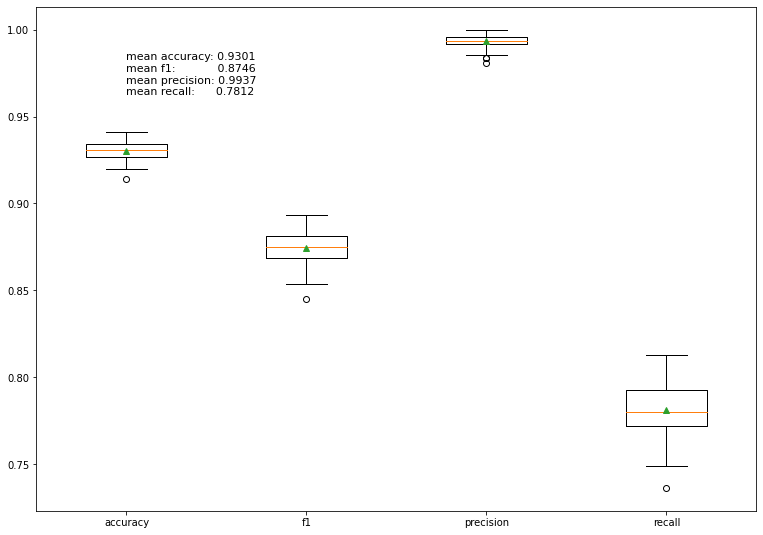

  0%|          | 0/100 [00:00<?, ?it/s]

C = 6.906043210907698


100%|██████████| 100/100 [00:02<00:00, 36.05it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.923825  0.929270     0.934714
1         f1     0.861809  0.871964     0.882119
2  precision     0.989669  0.993804     0.997940
3     recall     0.761298  0.776874     0.792451


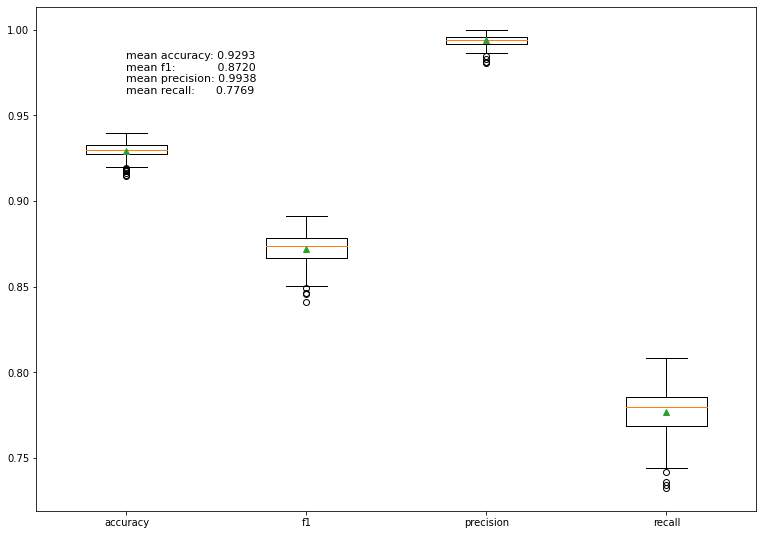

  0%|          | 0/100 [00:00<?, ?it/s]

C = 7.286427728546842


100%|██████████| 100/100 [00:02<00:00, 36.53it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.924695  0.930107     0.935520
1         f1     0.865027  0.874490     0.883953
2  precision     0.991192  0.994435     0.997677
3     recall     0.765337  0.780503     0.795669


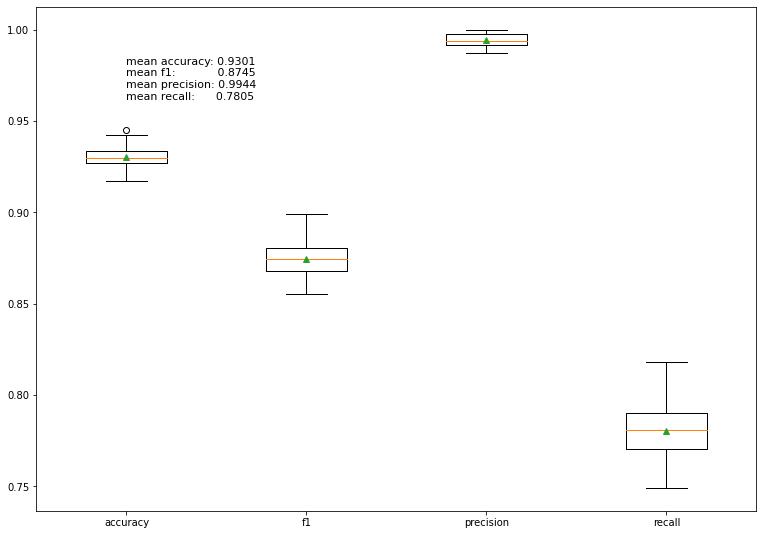

  0%|          | 0/100 [00:00<?, ?it/s]

C = 7.685113737513525


100%|██████████| 100/100 [00:02<00:00, 36.13it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.924634  0.929571     0.934508
1         f1     0.863464  0.873050     0.882637
2  precision     0.991569  0.995086     0.998603
3     recall     0.762817  0.777809     0.792802


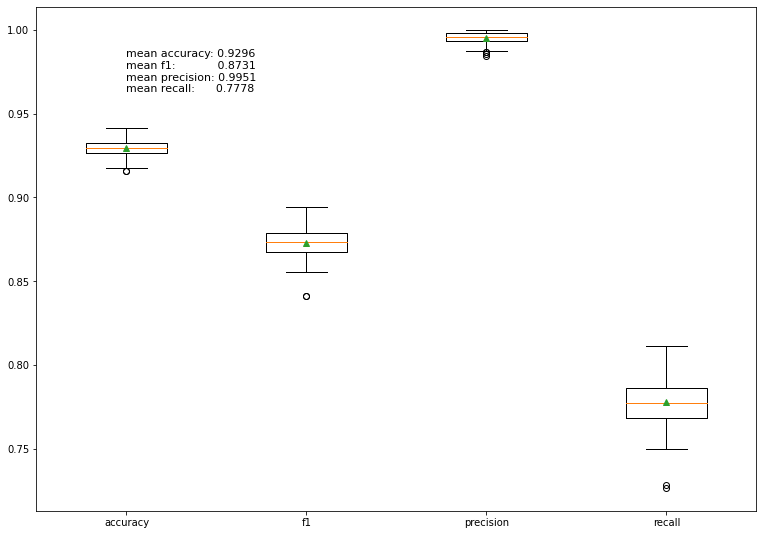

  0%|          | 0/100 [00:00<?, ?it/s]

C = 8.102981779915218


100%|██████████| 100/100 [00:02<00:00, 36.84it/s]

      metric  lower_bound      mean  upper_bound
0   accuracy     0.925542  0.930388     0.935234
1         f1     0.865963  0.874507     0.883050
2  precision     0.992044  0.995000     0.997956
3     recall     0.766558  0.780155     0.793752


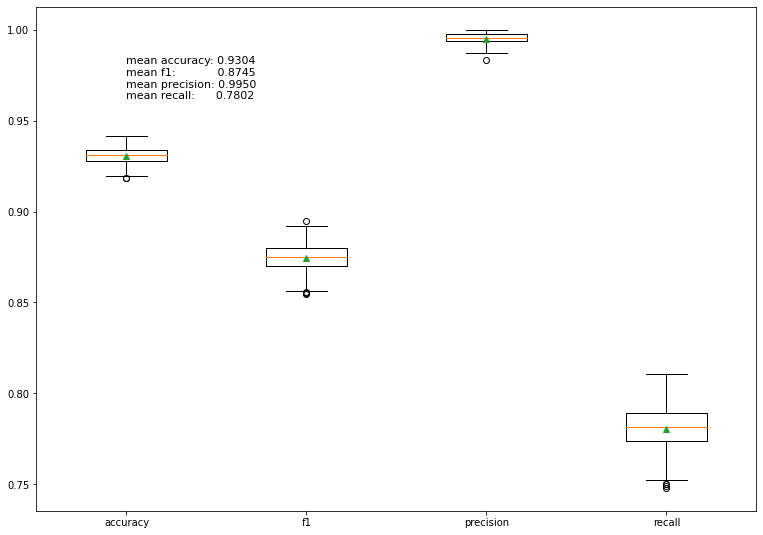

  0%|          | 0/100 [00:00<?, ?it/s]

C = 8.54095476349994


100%|██████████| 100/100 [00:02<00:00, 36.91it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.926422  0.931650     0.936878
1         f1     0.866803  0.876606     0.886410
2  precision     0.992220  0.995185     0.998150
3     recall     0.767839  0.783416     0.798993


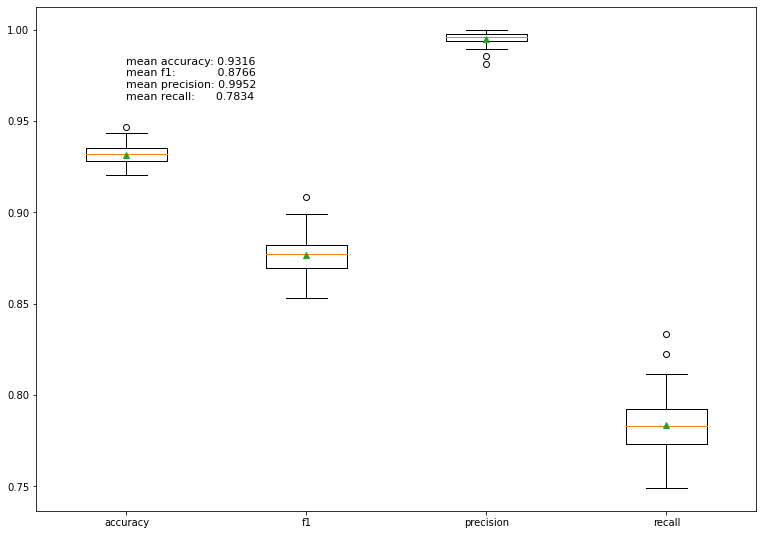

  0%|          | 0/100 [00:00<?, ?it/s]

C = 9.0


100%|██████████| 100/100 [00:02<00:00, 36.07it/s]


      metric  lower_bound      mean  upper_bound
0   accuracy     0.926060  0.930909     0.935759
1         f1     0.866524  0.875568     0.884612
2  precision     0.992533  0.995470     0.998407
3     recall     0.767437  0.781556     0.795674


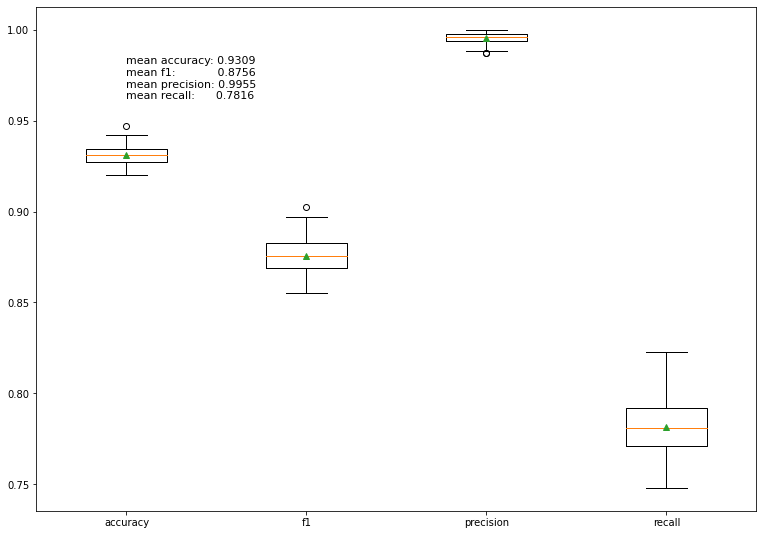

In [6]:
from analysis_functions import confidence_interval_logistic_regression_combined
for C in list(np.logspace(0,1) - 1)[1:]:
    print(f'C = {C}')
    results = confidence_interval_logistic_regression_combined(num_iterations=100, df=df, col='norm_combined_features', C=C)

In [5]:
df['content_meta_combined'] = df.apply(lambda row: np.concatenate((row.content_tfidf, row.meta_tfidf), axis=0),axis=1)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ewais\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

      metric  lower_bound    mean  upper_bound
0   accuracy     0.680606  0.6893     0.697995
1         f1     0.000000  0.0000     0.000000
2  precision     0.000000  0.0000     0.000000
3     recall     0.000000  0.0000     0.000000


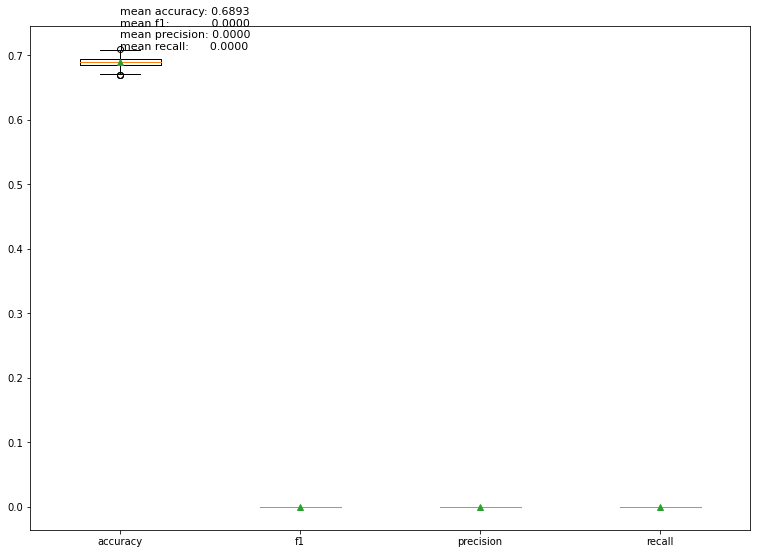

In [7]:
from analysis_functions import confidence_interval_logistic_regression_combined

results = confidence_interval_logistic_regression_combined(num_iterations=100, df=df, col='content_meta_combined')